### IMPORTS

In [122]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [124]:
SAVE_PATH = "../saves/"

In [125]:
def get_pareto_old(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [126]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            # Compare the current element with all other elements using broadcasting
            is_dominated = np.all(arr_np[i] <= arr_np, axis=1) & np.any(arr_np[i] < arr_np, axis=1)
            # Update the mask to mark dominated elements as False
            is_pareto_efficient[is_dominated] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient

### Visualization

In [127]:
print(os.listdir(SAVE_PATH))
savefile = os.listdir(SAVE_PATH)[-1]
"Visualizing data from: " + savefile

['pareto.csv', 'saves_1710502540563.csv', 'saves_1710502616293.csv', 'saves_1710502702203.csv', 'saves_1710502795933.csv', 'saves_1710513923401.csv', 'saves_1710514182799.csv', 'saves_1710514219897.csv', 'saves_1710514418808.csv', 'saves_1710514601277.csv', 'saves_1710514689193.csv', 'saves_1710514832352.csv', 'saves_1710515003559.csv', 'saves_1710515295123.csv', 'saves_1710515637176.csv', 'saves_1710519955596.csv', 'saves_1710520847852.csv']


'Visualizing data from: saves_1710520847852.csv'

In [128]:
# Read CSV
contracts = pd.read_csv(SAVE_PATH+savefile, sep=';')
contracts.drop_duplicates(inplace=True)
print(contracts.shape)
contracts.head()

(1464, 5)


,utilA,utilB,utilSum,contract,pareto
0,1544,7481,9025,"[34,195,129,70,19,87,121,178,127,132,130,84,77...",False
1,1554,7466,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False
2,1549,7471,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False
3,1539,7486,9025,"[34,195,129,70,19,87,121,178,127,132,130,84,77...",False
4,1544,7476,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False


In [129]:
contracts[::-1]

,utilA,utilB,utilSum,contract,pareto
1463,2474,6915,9389,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",True
1462,2418,6924,9342,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",True
1461,2419,6924,9343,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",False
1460,2475,6914,9389,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",True
1459,2430,6922,9352,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",True
...,...,...,...,...,...
4,1544,7476,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False
3,1539,7486,9025,"[34,195,129,70,19,87,121,178,127,132,130,84,77...",False
2,1549,7471,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False
1,1554,7466,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False


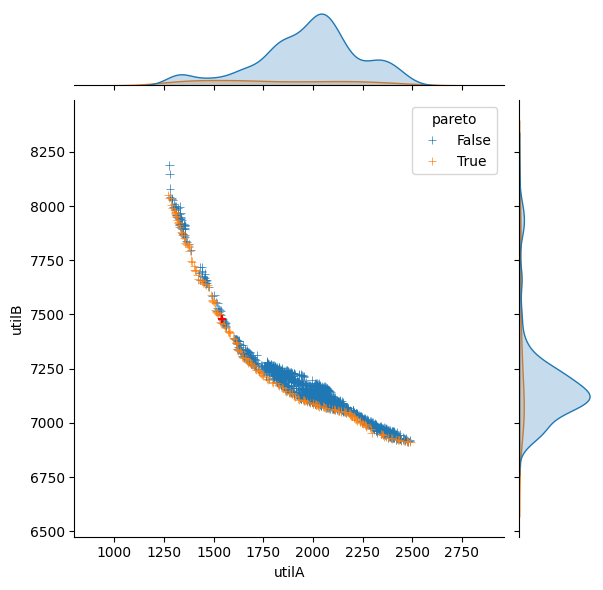

In [130]:
if "pareto" in contracts.columns and np.all(~contracts["pareto"].isna()):
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue="pareto", marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red', marker="+")
else:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue=contracts.index, marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red')

In [131]:
# Determine pareto-efficient contracts if necessary
if "pareto" not in contracts.columns or np.any(contracts["pareto"].isna()):
    contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
    contracts = contracts.drop_duplicates()
    contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
contracts

,utilA,utilB,utilSum,contract,pareto
0,1544,7481,9025,"[34,195,129,70,19,87,121,178,127,132,130,84,77...",False
1,1554,7466,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False
2,1549,7471,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False
3,1539,7486,9025,"[34,195,129,70,19,87,121,178,127,132,130,84,77...",False
4,1544,7476,9020,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",False
...,...,...,...,...,...
1459,2430,6922,9352,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",True
1460,2475,6914,9389,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",True
1461,2419,6924,9343,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",False
1462,2418,6924,9342,"[34,198,174,190,109,118,6,193,172,132,130,22,1...",True
